Parece ser que hay varias imágenes corruptas. El problema es que no dan fallo al abrir, simplemente no aparece la galaxia.
Muestro un ejemplo de cómo se ve.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import pandas as pd

Pruebo lo que me ha comentado Manuel.

No me sirve. Obviamente, pues la imágen si que carga. Se me ocurre hacer otra cosa. Las imágenes corruptas poseen muchos pixeles en negro, con valor 0. Puedo hacer una de los 100 primeros píxeles y si es 0, es que la imágen está corrupta. Veremos.

In [3]:
corrupta1 = []
# Ruta de la carpeta que contiene las imágenes
carpeta = "C:\\Users\\maseo\\OneDrive\\Escritorio\\GalaxyClassification\\Data\\Images"
# Lista de archivos en la carpeta
archivos = os.listdir(carpeta)

# Iterar sobre las imágenes en la carpeta
for nombre_archivo in os.listdir(carpeta):
    ruta_archivo = os.path.join(carpeta, nombre_archivo)
    
    # Leer el archivo de imagen
    contenido = tf.io.read_file(ruta_archivo)
    
    # Decodificar el contenido en un tensor de imagen
    imagen_tensor = tf.image.decode_image(contenido)
    
    # Obtener dimensiones de la imagen
    alto, ancho, _ = imagen_tensor.shape
    
    # Dividir la imagen en cuatro cuadrantes
    cuadrante_superior_izquierdo = imagen_tensor[:alto//2, :ancho//2, :]
    cuadrante_superior_derecho = imagen_tensor[:alto//2, ancho//2:, :]
    cuadrante_inferior_izquierdo = imagen_tensor[alto//2:, :ancho//2, :]
    cuadrante_inferior_derecho = imagen_tensor[alto//2:, ancho//2:, :]
    
    # Verificar si los píxeles en el segundo y cuarto cuadrante son negros
    if np.all(cuadrante_superior_izquierdo < 130) and np.all(cuadrante_inferior_izquierdo < 130):
        corrupta1.append(nombre_archivo)


Imágenes parcialmente negras:


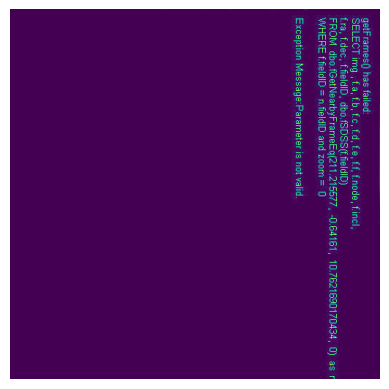

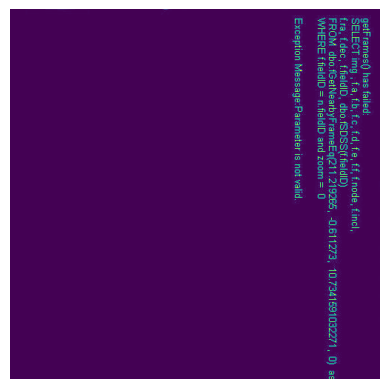

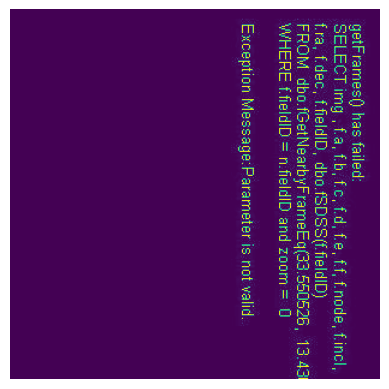

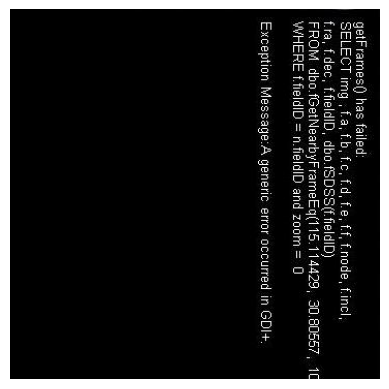

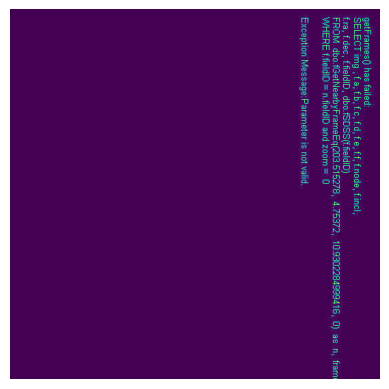

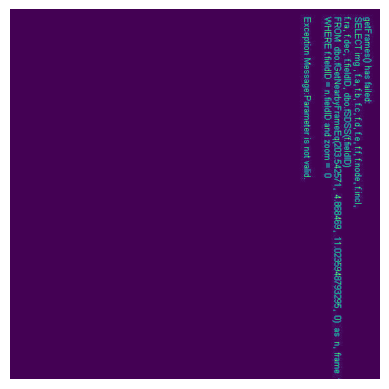

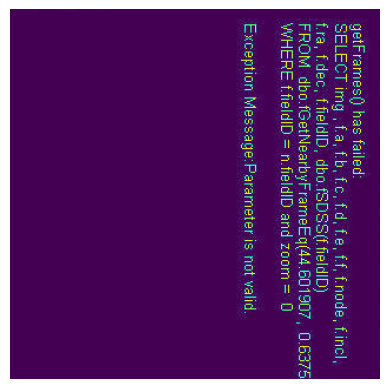

In [4]:

# Imprimir las imágenes parcialmente negras encontradas
print("Imágenes parcialmente negras:")
for nombre_archivo in corrupta1:
    imagen = plt.imread(os.path.join(carpeta, nombre_archivo))     
    # Mostrar la imagen
    plt.imshow(imagen)
    plt.axis('off')  # Desactiva los ejes
    plt.show()


In [19]:
corrupta1

['fpC-000752-40-2-0452-0063.jpg',
 'fpC-000756-44-2-0637-0103.jpg',
 'fpC-001035-40-4-0183-0107.jpg',
 'fpC-002131-40-4-0054-0191.jpg',
 'fpC-002247-41-4-0285-0037.jpg',
 'fpC-002247-41-4-0285-0076.jpg',
 'fpC-002738-40-5-0216-0087.jpg']

In [20]:
nueva_lista = []

for elemento in corrupta1:
  nuevo_elemento = f"..\\..\\Data\\Images\\{elemento}"
  nueva_lista.append(nuevo_elemento)

print(nueva_lista)

['..\\..\\Data\\Images\\fpC-000752-40-2-0452-0063.jpg', '..\\..\\Data\\Images\\fpC-000756-44-2-0637-0103.jpg', '..\\..\\Data\\Images\\fpC-001035-40-4-0183-0107.jpg', '..\\..\\Data\\Images\\fpC-002131-40-4-0054-0191.jpg', '..\\..\\Data\\Images\\fpC-002247-41-4-0285-0037.jpg', '..\\..\\Data\\Images\\fpC-002247-41-4-0285-0076.jpg', '..\\..\\Data\\Images\\fpC-002738-40-5-0216-0087.jpg']


In [28]:
# Vamos a ver estas imágenes de que clase son

data = pd.read_csv('..\\..\\Data\\Dataset\\Train.csv', sep = ';')


data

,#JID,fpCid,TType,Clase
0,J091501.54+400211.31,..\..\Data\Images\fpC-002887-40-5-0207-0189.jpg,5.0,Spirals
1,J095803.45+363655.28,..\..\Data\Images\fpC-003647-41-3-0081-0112.jpg,1.0,Spirals
2,J035838.90-054836.79,..\..\Data\Images\fpC-001729-40-4-0478-0154.jpg,3.0,Spirals
3,J114515.03-014209.95,..\..\Data\Images\fpC-001140-40-5-0156-0092.jpg,1.0,Spirals
4,J074039.28+391359.86,..\..\Data\Images\fpC-001350-40-3-0058-0072.jpg,3.0,Spirals
...,...,...,...,...
11841,J075334.48+440543.45,..\..\Data\Images\fpC-001350-40-4-0094-0192.jpg,0.0,S0s
11842,J135854.28+553342.69,..\..\Data\Images\fpC-003712-40-5-0180-0046.jpg,-2.0,S0s
11843,J141007.63+545511.91,..\..\Data\Images\fpC-003712-40-5-0192-0214.jpg,-2.0,S0s
11844,J170425.89+391138.69,..\..\Data\Images\fpC-002207-40-5-0109-0222.jpg,-2.0,S0s


In [29]:
imagenes_corruptas = data[data["fpCid"].isin(nueva_lista)]

In [30]:
imagenes_corruptas

,#JID,fpCid,TType,Clase
481,J133403.65+044513.39,..\..\Data\Images\fpC-002247-41-4-0285-0037.jpg,5.0,Spirals
1192,J140452.62-003640.57,..\..\Data\Images\fpC-000756-44-2-0637-0103.jpg,5.0,Spirals
3284,J025824.45+003815.19,..\..\Data\Images\fpC-002738-40-5-0216-0087.jpg,5.0,Spirals
5384,J140451.74-003829.81,..\..\Data\Images\fpC-000752-40-2-0452-0063.jpg,1.0,Spirals
9653,J021412.12+132612.77,..\..\Data\Images\fpC-001035-40-4-0183-0107.jpg,0.0,S0s
10313,J133410.20+045206.49,..\..\Data\Images\fpC-002247-41-4-0285-0076.jpg,-2.0,S0s
10706,J074027.46+304820.07,..\..\Data\Images\fpC-002131-40-4-0054-0191.jpg,-3.0,S0s
